<h1 style="color:black" align="center">Минимизация Coursera</h1>

In [65]:
def minimize(function, grad, point, eta=0.1):
    for i in range(70):
        point -= eta * grad(point[0], point[1])
    print(point)

In [66]:
def fx(x, y):
    return 4*x**2 - 6*x*y - 34*x + 5*y**2 + 42*y + 7

def grad(x, y):
    f_x = 8*x - 6*y - 34
    f_y = -6*x + 10*y + 42
    return np.array([f_x, f_y])

In [67]:
minimize(fx, grad, [1, 2])

[ 2. -3.]


<h1 style="color:black" align="center">Настройки</h1>

**Подключение бибилиотек**

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'png'

**Генерация данных**

In [366]:
np.random.seed(1234)
# Возьмем 2 признака и 10000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

**Визуализация данных**

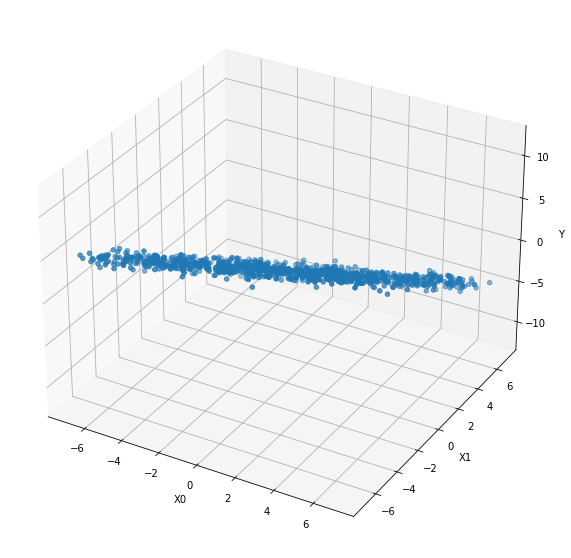

In [357]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

<h1 style="color:black" align="center">Метод наименьших квадратов</h1>

In [376]:
class Mnk:
    def mserror(self, y_pred, Y):
        return np.sum((y_pred - Y)**2) / len(Y)
        
    def fit(self, X, Y):
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        self.features = X.shape[1]
        self.weights = np.linalg.inv(np.dot(X.T, X)) @ X.T @ Y
    
    def predict(self, X):
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        return X.dot(self.weights)

In [377]:
model = Mnk()
model.fit(X, Y)
print(f"Веса модели {model.weights}")

Веса модели [ 0.46640589 -1.18312392  0.03865496]


In [378]:
y_pred = model.predict(X)
print(f"Функционал ошибки {model.mserror(y_pred, Y):.4f}")

Функционал ошибки 0.2398


<h1 style="color:black" align="center">Полный градиент</h1>

In [341]:
class LinearRegression:
    def __init__(self, eta=0.03, max_iter=1e4, min_weight_dist=1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    
    def grad(self, X, Y):
        return 2 / Y.shape[0] * np.dot(X.T, np.dot(X, self.w) - Y)
    
    def fit(self, X, Y):
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        iter_num = 0
        weight_dist = np.inf
        self.w = np.random.normal(size=X.shape[1])
        
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            new_w = self.w - self.eta * self.grad(X, Y)
            weight_dist = np.linalg.norm(new_w - self.w, ord=2)
            iter_num += 1
            self.w = new_w
            
    def predict(self, X):
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        return X.dot(self.w)
    
    def mserror(self, y_pred, Y):
        return np.sum((y_pred - Y)**2) / len(Y)

In [352]:
%%time
model = LinearRegression()
model.fit(X, Y)

Wall time: 15.1 s


LinearRegression()

In [343]:
model.w

array([ 0.4631442 , -1.18425939,  0.03191361])

In [344]:
y_pred = model.predict(X)
print(f"Функционал ошибки {model.mserror(y_pred, Y):.4f}")

Функционал ошибки 0.2434


In [345]:
shift=10
Y_shift=Y+shift
lr=LinearRegression()
lr.fit(X, Y_shift)

In [346]:
lr.w

array([ 0.4631442 , -1.18425939, 10.0319136 ])

<h1 style="color:black" align="center">Полный градиент Версия 2</h1>

### Генерация данных

In [176]:
np.random.seed(1234)
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, 1))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((n_features, 1))

In [177]:
display(w, w_true, X, Y[:5])

array([[0.],
       [0.]])

array([[ 0.47143516],
       [-1.19097569]])

array([[-0.87181165,  3.99502017],
       [ 3.91966131, -3.18370353],
       [-3.12950043,  4.22621049],
       ...,
       [ 3.51597757,  5.11940305],
       [ 6.35903104,  5.31390661],
       [ 5.12347492,  2.96879971]])

array([[-5.71937308],
       [ 6.42200487],
       [-6.22754907],
       [-3.61309248],
       [-1.24952278]])

In [178]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w)
    return np.sum((y - y_real)**2) / y_real.shape[0]

In [179]:
def mserror_grad(X, w, y_real):
    return 2 * X.T.dot(X.dot(w)-y_real) / y_real.shape[0]

In [29]:
mserror(X, w_true, Y), mserror(X, w, Y)

(0.24274458418002065, 26.37079744484684)

In [36]:
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(self.w0 + X.dot(w) - y_real)
        return 2*X.T.dot(delta)/y_real.shape[0], 2*np.sum(delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [37]:
Y_shift=Y+1000
lr=linear_regression(0.5)
lr.fit(X, Y_shift)
lr.test(X, Y_shift)

ValueError: shapes (1000,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [185]:
 def mserror_grad(X, w, w0, y_real):
    delta=(w0 + X.dot(w) - y_real)
    return 2 * X.T.dot(delta)/y_real.shape[0], 2 * np.sum(delta)/y_real.shape[0]

In [186]:
 def mserror_grad2(X, w, w0, y_real):
    delta=(w0 + X.dot(w) - y_real)
    return 2 * X.T.dot(delta)/y_real.shape[0], 2 * np.sum(delta)/y_real.shape[0]

In [192]:
mserror_grad(X, w, w0, Y)

(array([[-15.32075833],
        [ 38.20974168]]),
 21.931172850857873)

In [207]:
w02 = np.random.normal(size=(1000, 1))
w02[:, 0] = 11

In [208]:
mserror_grad2(X, w, w02, Y)

(array([[-15.32075833],
        [ 38.20974168]]),
 21.931172850857873)

In [170]:
np.random.seed(1234)
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, 1))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((n_features, 1))

In [171]:
Y = Y + 1

In [172]:
# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]
w0 = 0
w = np.zeros((n_features, 1))

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.9

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    gr_w, gr_w0,  = mserror_grad(X, w, w0, Y)
    new_w = w - eta * gr_w
    new_w0= w0 - eta * gr_w0
    if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
        eta=eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
    weight_dist = np.sqrt(np.linalg.norm(new_w - w)**2+(new_w0 - w0)**2)
    
    w_list.append(new_w.copy().flatten())
    cur_error=mserror(X, new_w, Y)
    print('curent error: {0}'.format(cur_error))
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    w0 = new_w0
    
w_list = np.array(w_list)

curent error: 20732.702164279002
curent error: 1762.0032867884263
curent error: 157.38861152409024
curent error: 15.470329888318119
curent error: 2.6267201711533437
curent error: 1.4446274523540723
curent error: 1.332631602484697
curent error: 1.3211439984287885
curent error: 1.3196912489695978
curent error: 1.3194134053194833
curent error: 1.3193220697197863
curent error: 1.3192729030926036
curent error: 1.3192363539310217
curent error: 1.3192047247623186
curent error: 1.319175740134678
curent error: 1.3191486532600016
curent error: 1.3191231714103415
curent error: 1.3190991418759055
curent error: 1.3190764583130583
curent error: 1.319055032445218
curent error: 1.3190347852881208
curent error: 1.3190156442348333
curent error: 1.3189975419156872
curent error: 1.3189804156101377
curent error: 1.318964206843169
curent error: 1.3189488610547855
curent error: 1.3189343273078087
curent error: 1.3189205580222243
curent error: 1.3189075087313409
curent error: 1.318895137857214
curent error: 1

In [173]:
w_list[-1]

array([ 0.46640589, -1.18312392])

In [174]:
w_true

array([[ 0.47143516],
       [-1.19097569]])

In [175]:
w0

1.0386551659371226